In [1]:
import pickle

In [5]:
fc_umap_embeddings = pickle.load(open("/users/soumya.kundu/locusselect/examples/dl_fc_embedding_list.pickle", "rb"))

In [6]:
len(fc_umap_embeddings)

6

In [13]:
%%bash
for idx in 0 1 2 3 4 5; do
    bedfile="../coordinates/coordinates_"$idx".bed"
    cat $bedfile | perl -lane 'print $F[0]."\t".($F[1]+$F[9]-500)."\t".($F[1]+$F[9]+500)' > expanded_coordinates_$idx.bed
    bedtools getfasta -fi /data/refs/hg19/male.hg19.fa -bed expanded_coordinates_$idx.bed > expanded_coordinates_$idx.fa
done

In [20]:
#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels)
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

In [22]:
import numpy as np

indices = [0,1,2,3,4,5]
fastafiles = ["expanded_coordinates_"+str(idx)+".fa" for idx in indices]
sequences_sets = [[x[1].rstrip() for x in enumerate(open(fastafile)) if x[0]%2==1]
                  for fastafile in fastafiles]
onehots = [np.array([one_hot_encode_along_channel_axis(x) for x in sequences])
           for sequences in sequences_sets]

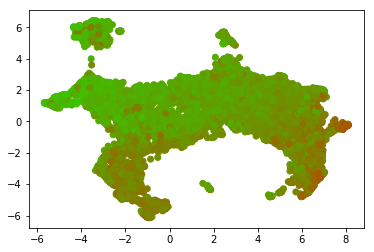

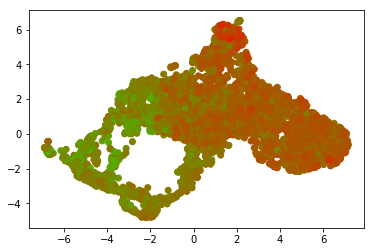

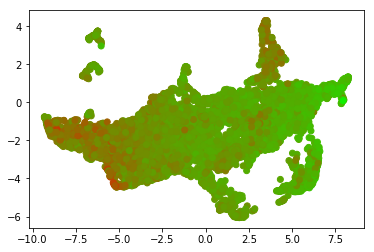

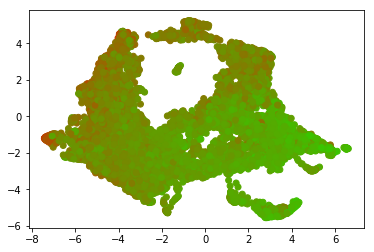

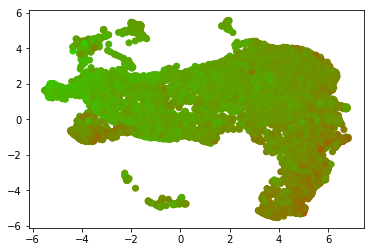

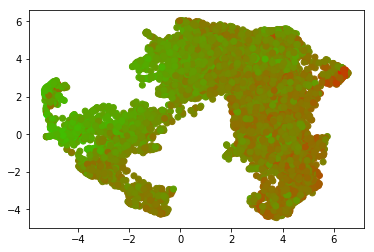

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt

umap_embeddings_ordering = {
    'RBM38': 0,
    'HBA2': 1,
    'LMO2': 2,
    'HBE1': 3,
    'BCL11A': 4,
    'MYC': 5
}
[5,1,3,2,0,4]

sequences_ordering = {
    0:'BCL11A',
    1:'HBA2',
    2:'HBE1',
    3:'LMO2',
    4:'MYC',
    5:'RBM38'}

for idx in [0,1,2,3,4,5]:
    sequences = sequences_sets[idx]
    onehot = onehots[idx]
    basefracs = np.mean(onehot[:,375:625,:],axis=1)
    gc_contents = basefracs[:,1]+basefracs[:,2]
    colors = [(gc_frac,1-gc_frac,0) for gc_frac in gc_contents]
    plt.scatter(fc_umap_embeddings[umap_embeddings_ordering[sequences_ordering[idx]]][:,0],
                fc_umap_embeddings[umap_embeddings_ordering[sequences_ordering[idx]]][:,1], alpha=1,
                color=colors)
    plt.show()

In [23]:
onehots[0].shape

(8001, 1000, 4)